<a href="https://colab.research.google.com/github/isaacmaker/Learnpytorch/blob/main/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3): # Changed in_features to 5
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x)) # Changed to self.fc2
    x = self.out(x)

    return x

In [3]:
torch.manual_seed(41)
model = Model()

In [4]:
url ="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df["variety"] = my_df["variety"].replace("Setosa",0.0)
my_df["variety"] = my_df["variety"].replace("Versicolor",1.0)
my_df["variety"] = my_df["variety"].replace("Virginica",2.0)

In [5]:
X = my_df.drop("variety",axis=1)
y = my_df["variety"]


In [6]:
X = X.values
X
y = y.values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=41)

In [9]:
X_train = torch.FloatTensor(X_train)
X_train
X_test = torch.FloatTensor(X_test)

In [10]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr=0.01)

In [12]:
epochs = 500
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  percentage_value = loss
  loss
  per2 = percentage_value.item()
  if i%10 == 0:
    print(f"Epoch: {i} Loss: {per2}'%")
  # set gradients to zero
  opt.zero_grad()

  # calculate the gradients
  loss.backward()

  # update the weights
  opt.step()


Epoch: 0 Loss: 1.125203251838684'%
Epoch: 10 Loss: 1.0097211599349976'%
Epoch: 20 Loss: 0.8162347674369812'%
Epoch: 30 Loss: 0.585993230342865'%
Epoch: 40 Loss: 0.4003389775753021'%
Epoch: 50 Loss: 0.26794716715812683'%
Epoch: 60 Loss: 0.1796349585056305'%
Epoch: 70 Loss: 0.12165623158216476'%
Epoch: 80 Loss: 0.0860651507973671'%
Epoch: 90 Loss: 0.06522614508867264'%
Epoch: 100 Loss: 0.05286872014403343'%
Epoch: 110 Loss: 0.04508011043071747'%
Epoch: 120 Loss: 0.03979310765862465'%
Epoch: 130 Loss: 0.03596426919102669'%
Epoch: 140 Loss: 0.03302799537777901'%
Epoch: 150 Loss: 0.030512524768710136'%
Epoch: 160 Loss: 0.02773350290954113'%
Epoch: 170 Loss: 0.024612102657556534'%
Epoch: 180 Loss: 0.02167237363755703'%
Epoch: 190 Loss: 0.01932021789252758'%
Epoch: 200 Loss: 0.0174928717315197'%
Epoch: 210 Loss: 0.01604374870657921'%
Epoch: 220 Loss: 0.01483999565243721'%
Epoch: 230 Loss: 0.013800058513879776'%
Epoch: 240 Loss: 0.012878856621682644'%
Epoch: 250 Loss: 0.012144574895501137'%
Ep

Text(0.5, 0, 'Epochs')

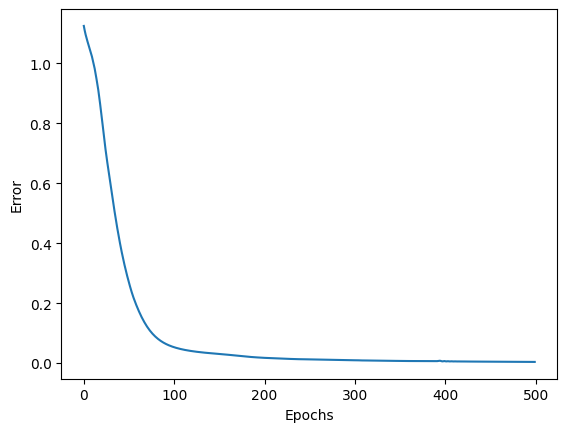

In [13]:
plt.plot(range(epochs),losses)
plt.ylabel("Error")
plt.xlabel("Epochs")

In [14]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [15]:
loss

tensor(0.4284)

In [16]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):+

    y_val = model.forward(data)
    print(f"{i+1} {str(y_val)} \t {y_test[i]}")

    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f"Accuracy: {correct/len(y_test)}","correct",correct)


1 tensor([-8.2336,  1.1611, 14.8379]) 	 2
2 tensor([-11.4864,  -2.9688,  23.8727]) 	 2
3 tensor([-13.1540,  -2.6258,  26.3003]) 	 2
4 tensor([  4.4491,  16.4351, -10.4554]) 	 1
5 tensor([-11.0531,  -0.9241,  20.9731]) 	 2
6 tensor([ 10.5526,  21.9904, -21.0539]) 	 1
7 tensor([-6.6075,  3.7984, 11.4673]) 	 2
8 tensor([  4.9884,  17.1023, -11.5365]) 	 1
9 tensor([-9.4947,  0.8017, 17.1606]) 	 2
10 tensor([-12.2819,  -3.2382,  25.4975]) 	 2
11 tensor([-5.1056,  5.3112,  8.5358]) 	 2
12 tensor([ 54.4761,  43.9803, -77.7899]) 	 0
13 tensor([ 49.3894,  39.7829, -70.4471]) 	 0
14 tensor([ 13.2979,  20.8678, -23.4904]) 	 1
15 tensor([ 47.2268,  39.7901, -68.2106]) 	 0
16 tensor([-2.9112,  7.9908,  4.1723]) 	 2
17 tensor([ 49.8759,  40.5112, -71.3275]) 	 0
18 tensor([-6.7868,  2.9861, 11.9566]) 	 1
19 tensor([ 56.9141,  45.3611, -80.9651]) 	 0
20 tensor([ 43.3723,  36.0724, -62.4133]) 	 0
21 tensor([ 12.4366,  21.4406, -22.8376]) 	 1
22 tensor([-11.9045,  -2.1597,  23.7128]) 	 2
23 tensor([ 47.

In [25]:
new_iris = torch.tensor([2.7,15.2,12.3,0.2])

In [26]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 29.6237,  24.7949, -42.5001])


In [21]:
newr_iris = torch.tensor(([-2.7256, 12.7115, 15.2784,0.2]))

In [22]:
with torch.no_grad():
  print(model.forward(newr_iris))

tensor([-2.7092, -2.9563, 10.8084])
